In [1]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline
import math
from tqdm import tqdm

In [2]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])

In [3]:
root = '/home/aalejo/proyectos/crowd-counting/csrnet/data/towncentre/'

In [4]:
towncenter_test = os.path.join(root,'test_data','images')
path_sets = [towncenter_test]

In [5]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [6]:
model = CSRNet()

In [7]:
model = model.cuda()

In [8]:
checkpoint = torch.load('0model_best.pth.tar')

In [9]:
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [10]:
mae = 0
mse = 0
for i in tqdm(range(len(img_paths))):
    img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground-truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
    mse += (output.detach().cpu().sum().numpy()-np.sum(groundtruth))**2
print ('mae=', mae/len(img_paths))
print ('mse=', math.sqrt(mse/len(img_paths)) )

100%|██████████| 500/500 [01:31<00:00,  5.47it/s]

mae= 0.9919098777771004
mse= 1.2819254560986433


Predicted Count :  21


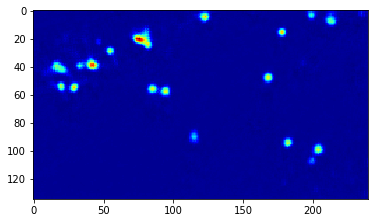

Original Count :  23


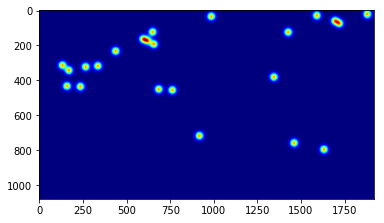

Original Image


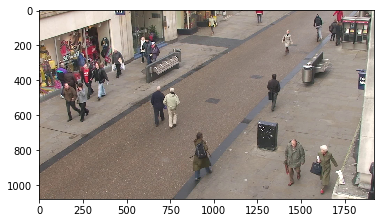

In [17]:
path = 'data/towncentre/test_data/images/IMG_3400.jpg';

from matplotlib import cm as c
img = transform(Image.open(path).convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))

temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('data/towncentre/test_data/ground-truth/IMG_3400.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread(path))
plt.show()